In [36]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [37]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('DataGathered/ProcesssedData/pickled_ten_year_filtered_lead_para_NDAQ.pkl')

In [38]:
df_stocks

,close,adj close,articles
2007-01-01,30.922000,3.915840e+06,. Estimates of Iraqi Civilian Deaths. Romania ...
2007-01-02,30.966000,4.633720e+06,". For Dodd, Wall Street Looms Large. Ford's Lo..."
2007-01-03,31.010000,5.351600e+06,". Ethics Changes Proposed for House Trips, K S..."
2007-01-04,31.889999,3.280300e+06,. I Feel Bad About My Face. Bush Recycles the ...
2007-01-05,33.099998,3.716400e+06,. Macworld Bingo. Anti-Surge Protests Against ...
2007-01-06,33.413332,3.699633e+06,. In da Car at Dakar. The Macworld-C.E.S. Conf...
2007-01-07,33.726667,3.682867e+06,. BitTorrent Comes to the Television. LG&#8217...
2007-01-08,34.040001,3.666100e+06,. That R2 Unit Is a Real Bargain. HDTV Heavy. ...
2007-01-09,33.830002,3.177200e+06,. The iPhone Rumors Are Right&#8230;Finally. P...
2007-01-10,35.279999,3.732400e+06,. A Ride in a Gaming Chair. More iPhone Fun Fa...


In [39]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [40]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [41]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_stocks

,prices,articles
2007-01-01,3915840,Estimates of Iraqi Civilian Deaths. Romania a...
2007-01-02,4633720,"For Dodd, Wall Street Looms Large. Ford's Los..."
2007-01-03,5351600,"Ethics Changes Proposed for House Trips, K St..."
2007-01-04,3280300,I Feel Bad About My Face. Bush Recycles the T...
2007-01-05,3716400,Macworld Bingo. Anti-Surge Protests Against M...
2007-01-06,3699633,In da Car at Dakar. The Macworld-C.E.S. Confl...
2007-01-07,3682866,BitTorrent Comes to the Television. LG&#8217;...
2007-01-08,3666100,That R2 Unit Is a Real Bargain. HDTV Heavy. L...
2007-01-09,3177200,The iPhone Rumors Are Right&#8230;Finally. Pr...
2007-01-10,3732400,A Ride in a Gaming Chair. More iPhone Fun Fac...


In [43]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,3915840
2007-01-02,4633720
2007-01-03,5351600
2007-01-04,3280300
2007-01-05,3716400
2007-01-06,3699633
2007-01-07,3682866
2007-01-08,3666100
2007-01-09,3177200
2007-01-10,3732400


In [44]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [45]:
df

,prices,compound,neg,neu,pos
2007-01-01,3915840,,,,
2007-01-02,4633720,,,,
2007-01-03,5351600,,,,
2007-01-04,3280300,,,,
2007-01-05,3716400,,,,
2007-01-06,3699633,,,,
2007-01-07,3682866,,,,
2007-01-08,3666100,,,,
2007-01-09,3177200,,,,
2007-01-10,3732400,,,,


In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

In [47]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
# ss = sid.polarity_scores(sentence)
# ss

In [48]:
# Checking date for empty strings
# for date, row in df_stocks.T.iteritems():
#     if type(df_stocks.loc[date, 'articles']).__name__ == 'str':
#         print date

In [49]:
df

,prices,compound,neg,neu,pos
2007-01-01,3915840,-0.9881,0.176,0.723,0.102
2007-01-02,4633720,-0.397,0.117,0.778,0.105
2007-01-03,5351600,-0.9994,0.196,0.749,0.055
2007-01-04,3280300,-0.9975,0.112,0.835,0.053
2007-01-05,3716400,-0.9882,0.118,0.8,0.082
2007-01-06,3699633,-0.9668,0.124,0.785,0.091
2007-01-07,3682866,-0.9957,0.162,0.772,0.066
2007-01-08,3666100,-0.8171,0.083,0.839,0.078
2007-01-09,3177200,-0.9932,0.091,0.864,0.046
2007-01-10,3732400,0.7728,0.095,0.804,0.101


In [50]:
train_start_date = '2007-01-01'
train_end_date = '2015-12-31'
test_start_date = '2016-01-01'
test_end_date = '2017-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [51]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [52]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [53]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [54]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
print (rf.feature_importances_)

[ 0.50343832  0.49656168]


In [56]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [57]:
prediction

array([  1877573.        ,   3005015.        ,   3657835.        ,
         1875793.2       ,   3019403.3       ,   1585450.3       ,
         2352453.1       ,   2117465.        ,    969623.3       ,
         2732981.65833333,   2112350.        ,   1695244.65      ,
         2862456.6       ,   1520181.3       ,   1998412.8       ,
         2482905.        ,   1558792.5       ,   1605783.1       ,
         2739496.66666667,   1341930.        ,   2180479.65      ,
         3350142.35      ,   1588476.6       ,   1376373.1       ,
         1273185.        ,   2818711.66666667,   2109208.33333333,
         1844710.        ,   1087070.        ,   2982173.1       ,
         1906634.85      ,   1536643.2       ,   3501586.2       ,
         1880517.5       ,   2596889.8       ,   1763586.5       ,
         2129190.43333333,   1931333.3       ,   1144442.33333333,
         1407944.8       ,   2307110.        ,   2181519.9       ,
         2549140.        ,   1172286.6       ,   3639483.2    

In [58]:
contributions

array([[ -2.51784777e+05,  -7.29678275e+04],
       [  6.67609263e+05,   1.35080132e+05],
       [  4.39811214e+05,   1.01569818e+06],
       [ -2.77413978e+05,  -4.91184264e+04],
       [  2.71635861e+05,   5.45441834e+05],
       [ -1.03916481e+04,  -6.06483657e+05],
       [  2.57347218e+05,  -1.07219723e+05],
       [  8.48305510e+03,  -9.33436599e+04],
       [ -4.39939644e+05,  -7.92762661e+05],
       [  9.40151091e+05,  -4.09495037e+05],
       [ -7.51377483e+04,  -1.48378565e+04],
       [ -2.99847013e+04,  -4.77096254e+05],
       [ -5.37369773e+05,   1.19750077e+06],
       [ -5.66721684e+05,  -1.15422621e+05],
       [ -1.04919980e+05,  -9.89928244e+04],
       [  5.81333184e+05,  -3.00753789e+05],
       [ -1.16041109e+05,  -5.27491996e+05],
       [ -1.89660678e+05,  -4.06881826e+05],
       [ -1.47903364e+05,   6.85074426e+05],
       [ -5.80490923e+05,  -2.79904682e+05],
       [ -3.42411113e+04,   1.23951566e+04],
       [  3.06642164e+05,   8.41174582e+05],
       [ -

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [70]:
predictions_df

,prices
2007-11-01,1683100
2007-11-02,14385000
2007-11-03,4097033
2007-11-04,1826450
2007-11-05,1368066
2007-11-06,3657700
2007-11-07,2825400
2007-11-08,5299000
2007-11-09,3240900
2007-11-10,2068200


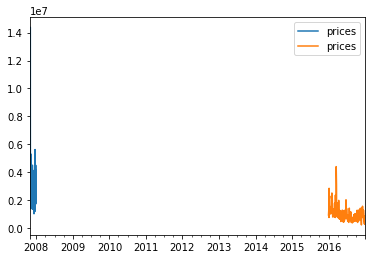

In [71]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()

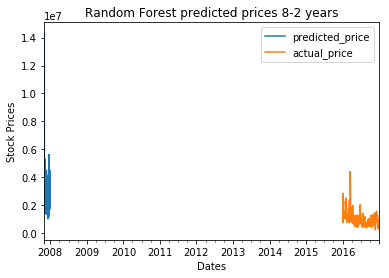

In [72]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

In [73]:
test

,prices,compound,neg,neu,pos
2007-11-01,1919000,-0.9936,0.129,0.791,0.08
2007-11-02,3115000,-0.9476,0.108,0.799,0.092
2007-11-03,2903133,-0.995,0.181,0.719,0.1
2007-11-04,2691266,-0.9464,0.125,0.795,0.08
2007-11-05,2479400,-0.9688,0.104,0.809,0.087
2007-11-06,5738900,-0.9957,0.131,0.786,0.083
2007-11-07,4141400,-0.9977,0.152,0.758,0.09
2007-11-08,4551900,-0.9967,0.137,0.784,0.079
2007-11-09,10807100,-0.9991,0.195,0.684,0.121
2007-11-10,9058866,-0.9657,0.147,0.742,0.111


# Increasing the prices by a constant value so that it represents closing price during the testing

In [74]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

4740596.5
2007-11-02
2007-11-03
2007-11-04
2007-11-05
2007-11-06
2007-11-07
2007-11-08
2007-11-09
2007-11-10
2007-11-11
4045084.9
695511.6


In [75]:
predictions_df

,prices
2007-11-01,1683100
2007-11-02,14385000
2007-11-03,4097033
2007-11-04,1826450
2007-11-05,1368066
2007-11-06,3657700
2007-11-07,2825400
2007-11-08,5299000
2007-11-09,3240900
2007-11-10,2068200


In [76]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2007-11-01,2378611.6
2007-11-02,15080511.6
2007-11-03,4792544.6
2007-11-04,2521961.6
2007-11-05,2063577.6
2007-11-06,4353211.6
2007-11-07,3520911.6
2007-11-08,5994511.6
2007-11-09,3936411.6
2007-11-10,2763711.6


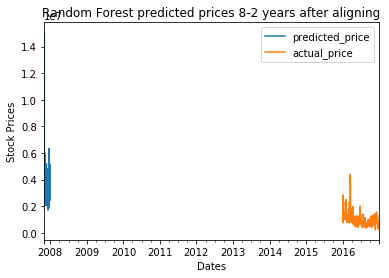

In [77]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

# Smoothing the time series data

# Applying EWMA pandas to smooth the stock prices

In [78]:
predictions_df

,prices
2007-11-01,2378611.6
2007-11-02,15080511.6
2007-11-03,4792544.6
2007-11-04,2521961.6
2007-11-05,2063577.6
2007-11-06,4353211.6
2007-11-07,3520911.6
2007-11-08,5994511.6
2007-11-09,3936411.6
2007-11-10,2763711.6


In [79]:
predictions_df['ewma'] = pd.ewma(predictions_df["prices"], span=60, freq="D")

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [80]:
predictions_df

,prices,ewma
2007-11-01,2378611.6,2.378612e+06
2007-11-02,15080511.6,8.835411e+06
2007-11-03,4792544.6,7.442623e+06
2007-11-04,2521961.6,6.150277e+06
2007-11-05,2063577.6,5.277555e+06
2007-11-06,4353211.6,5.110380e+06
2007-11-07,3520911.6,4.859987e+06
2007-11-08,5994511.6,5.018889e+06
2007-11-09,3936411.6,4.881965e+06
2007-11-10,2763711.6,4.636980e+06


In [81]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D")

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  


In [82]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2007-11-01,2378611.6,2.378612e+06,1919000,1.919000e+06
2007-11-02,15080511.6,8.835411e+06,3115000,2.526967e+06
2007-11-03,4792544.6,7.442623e+06,2903133,2.656558e+06
2007-11-04,2521961.6,6.150277e+06,2691266,2.665674e+06
2007-11-05,2063577.6,5.277555e+06,2479400,2.625894e+06
2007-11-06,4353211.6,5.110380e+06,5738900,3.188909e+06
2007-11-07,3520911.6,4.859987e+06,4141400,3.338957e+06
2007-11-08,5994511.6,5.018889e+06,4551900,3.508843e+06
2007-11-09,3936411.6,4.881965e+06,10807100,4.432010e+06
2007-11-10,2763711.6,4.636980e+06,9058866,4.967125e+06


In [83]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

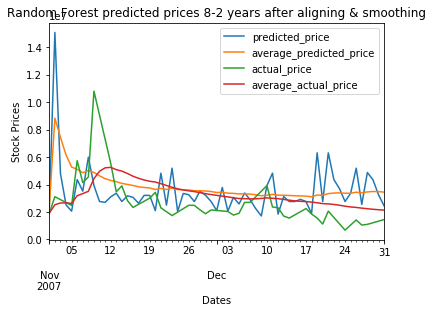

In [84]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()

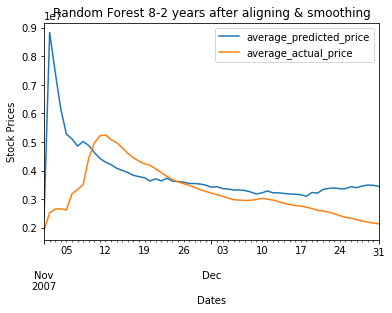

In [85]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()

# Increasing the prices by a constant value so that it represents closing price during the testing

In [86]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

# LogisticRegression

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

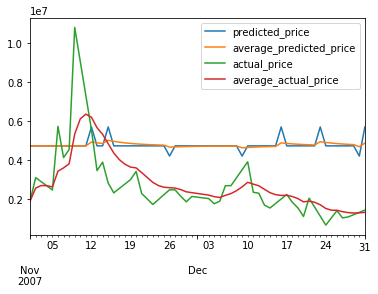

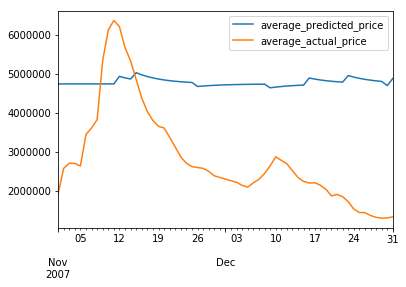

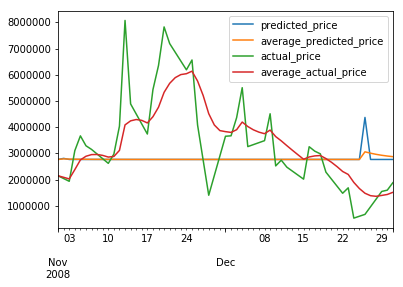

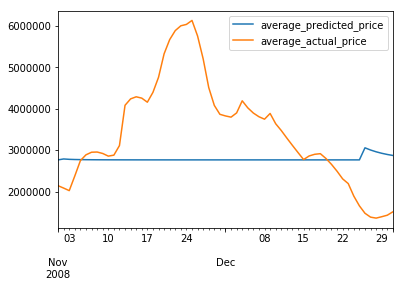

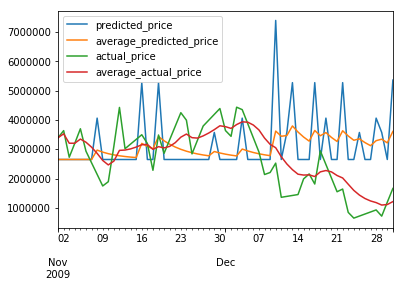

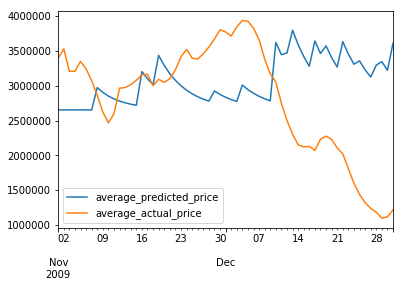

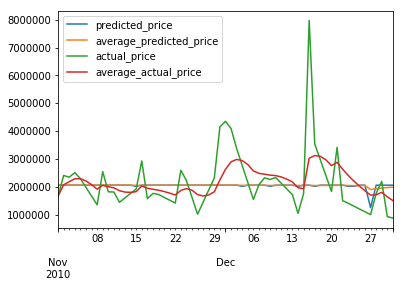

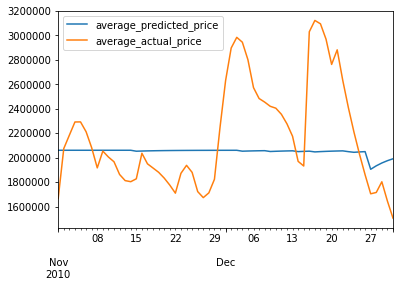

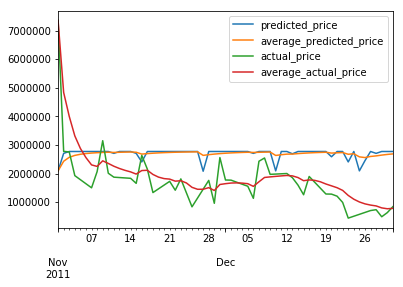

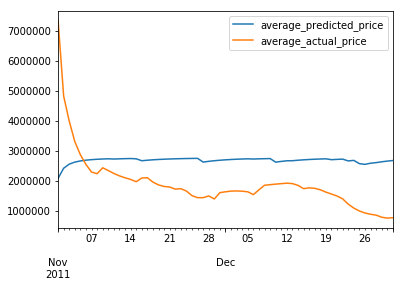

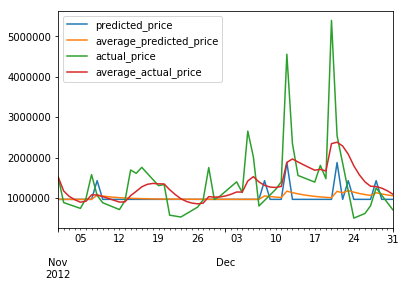

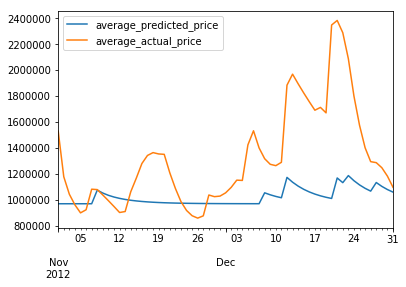

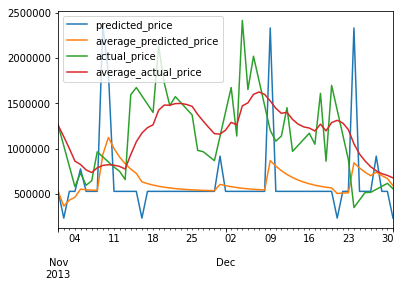

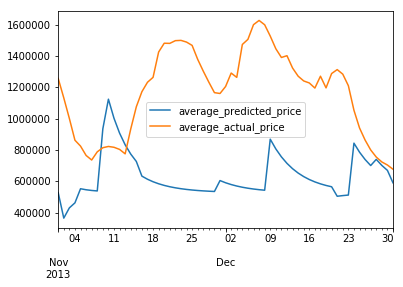

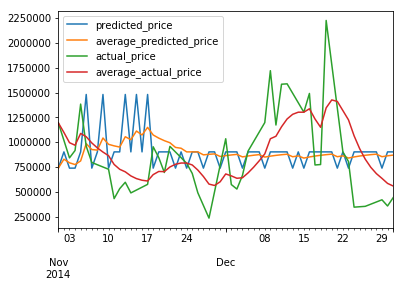

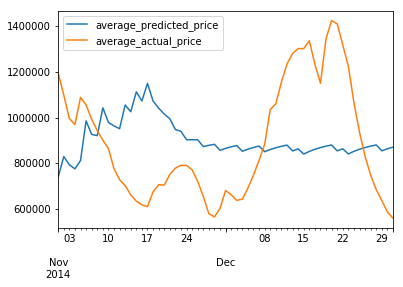

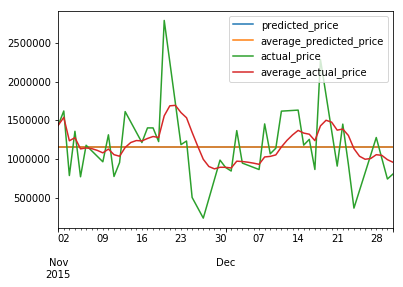

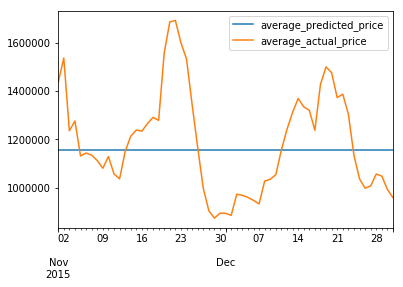

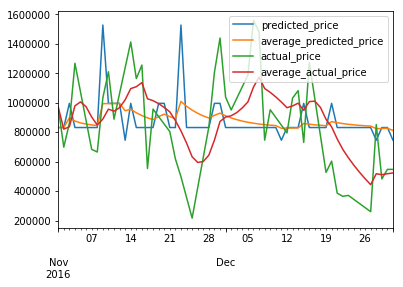

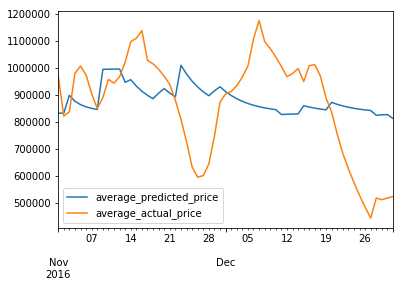

In [87]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [ ]:
lr.classes_

In [ ]:
lr.coef_[0]

# RandomForestRegressor

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,freq=D,adjust=True,ignore_na=False)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

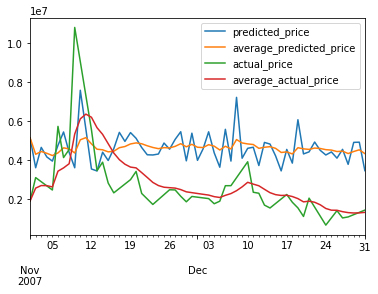

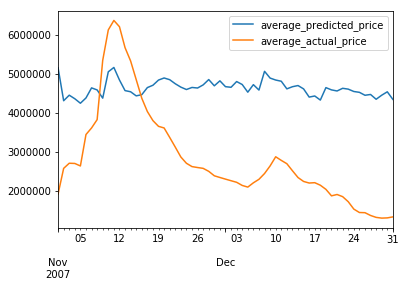

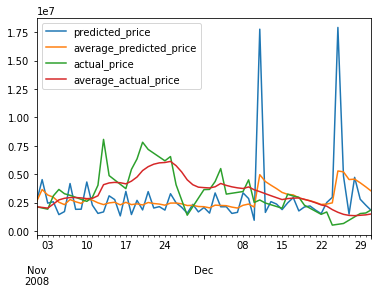

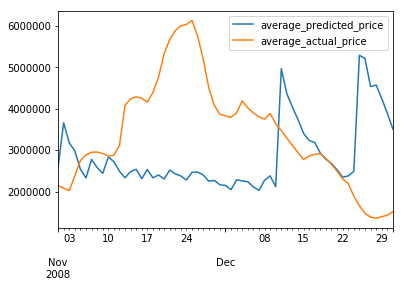

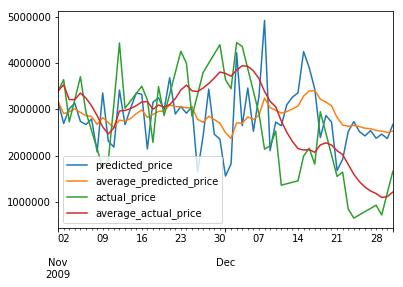

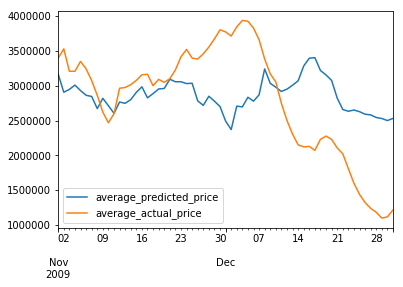

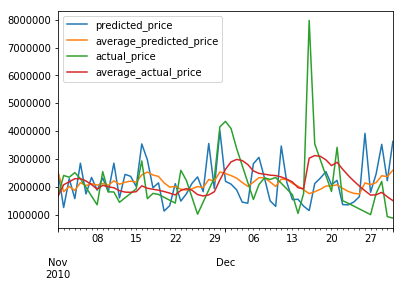

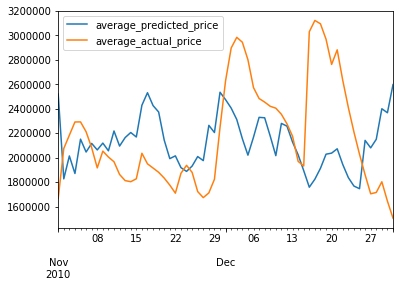

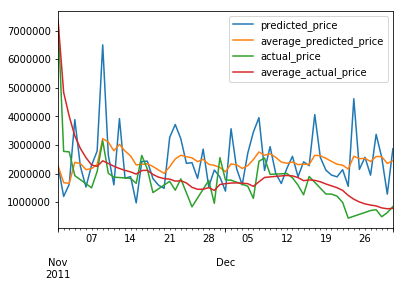

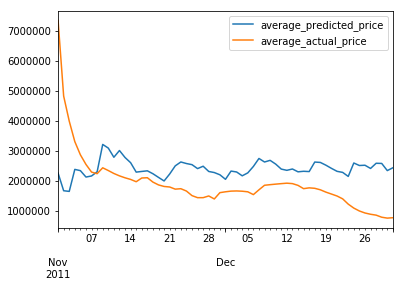

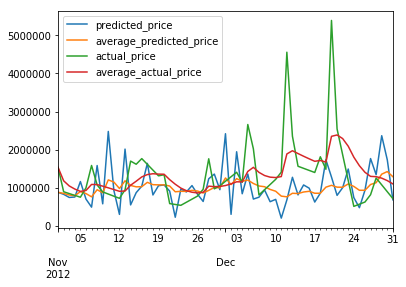

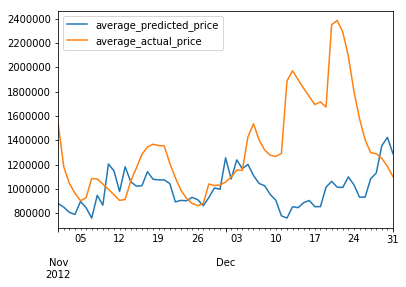

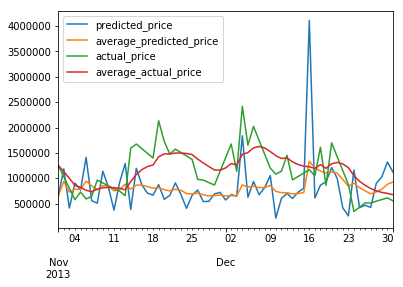

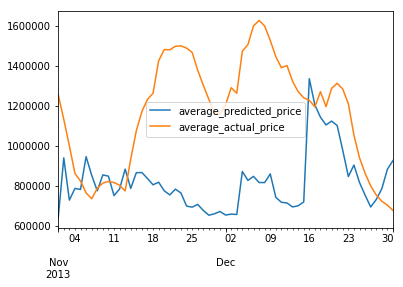

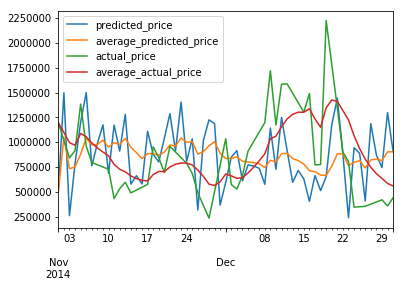

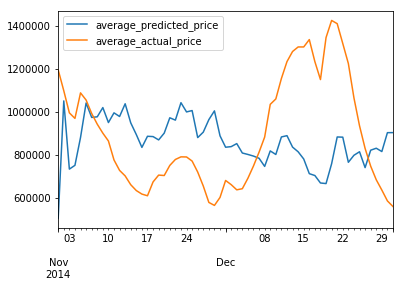

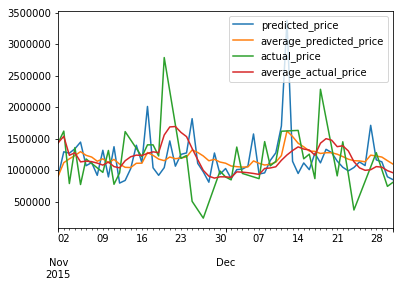

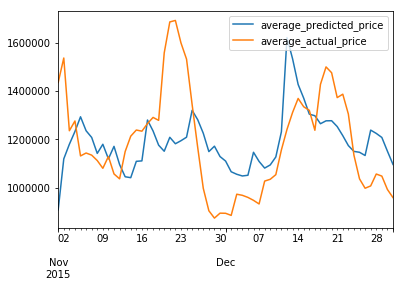

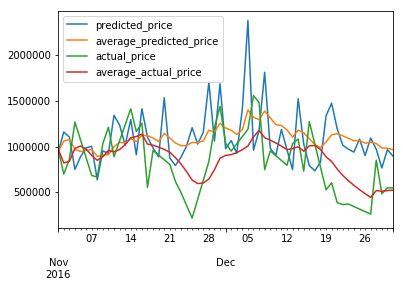

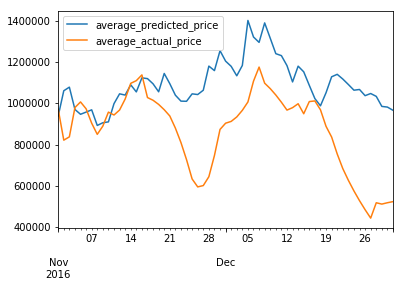

In [93]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=665)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()
    

In [ ]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=20, freq="D")
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=20, freq="D")
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()



import pickle
filename = 'finalized_model_NDAQ.sav'
pickle.dump(mlpc, open(filename, 'wb'))


   

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)

In [ ]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

In [ ]:
#import pickle
#filename = 'finalized_model.sav'
#pickle.dump(mlpc, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test,)
print(result)